<a href="https://colab.research.google.com/github/toraDK/ChatAppK3/blob/main/Minggu5_28.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Folder

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import library

In [3]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

# **PRAKTIKUM D1**

Membuat Historam Citra

<BarContainer object of 256 artists>

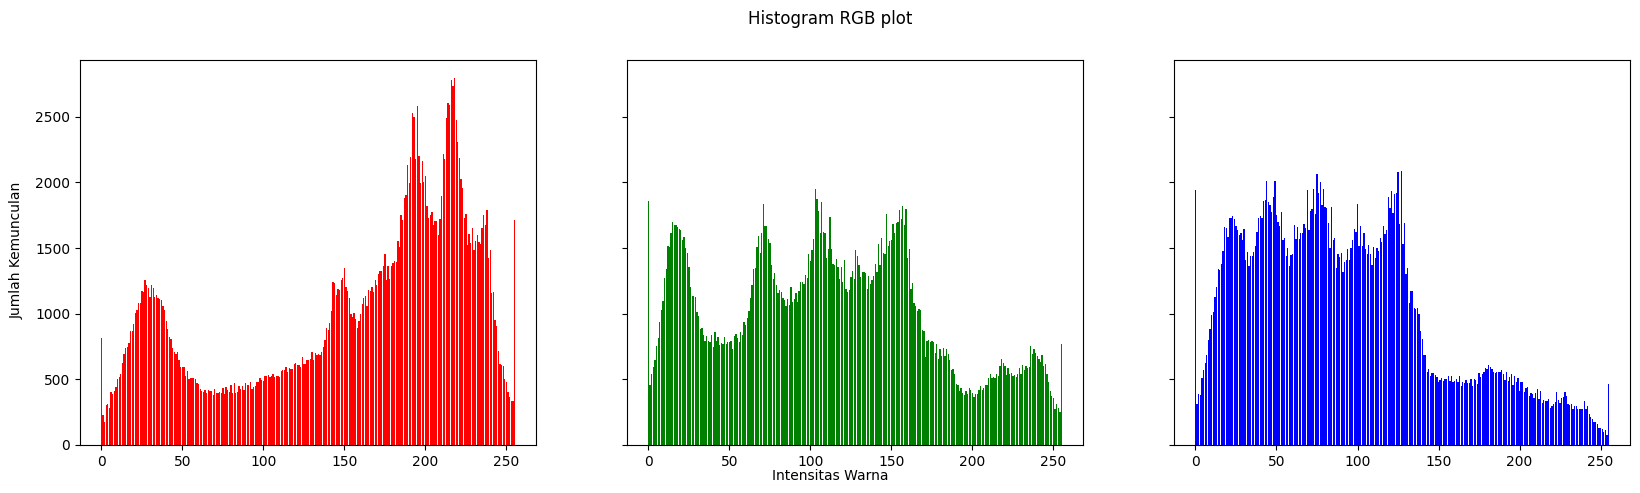

In [4]:
# membuat histogram image (manual)
img = cv.imread('/content/drive/MyDrive/Polinema/tugasSemester5/PengolahanCitradanVisiKomputer/Pertemuan 5/Lena.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

height, width, depth = np.shape(img)
names = np.arange(256)

red = [0]*256
green = [0]*256
blue = [0]*256

for y in range(0,height) :
  for x in range(0,width) :
    red[img[y][x][0]] += 1
    green[img[y][x][1]] += 1
    blue[img[y][x][2]] += 1

names = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')

fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0].bar(names, red, color='red')
axs[1].bar(names, green, color='green')
axs[2].bar(names, blue, color='blue')

Merubah gambar dari rgb ke grayscale dan mengembalikannya lagi menjadi rgb

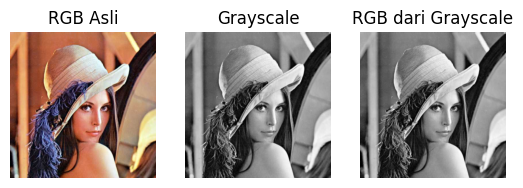

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Baca gambar RGB
img = cv2.imread("/content/drive/MyDrive/Polinema/tugasSemester5/PengolahanCitradanVisiKomputer/Pertemuan 5/Lena.jpg")      # gambar dibaca dalam format BGR
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # ubah ke RGB agar sesuai

# --- Konversi RGB ke Grayscale manual ---
R = img[:, :, 0]
G = img[:, :, 1]
B = img[:, :, 2]

gray = (0.299 * R + 0.587 * G + 0.114 * B).astype(np.uint8)

# --- Konversi Grayscale ke RGB manual ---
rgb_from_gray = np.zeros_like(img)
rgb_from_gray[:, :, 0] = gray
rgb_from_gray[:, :, 1] = gray
rgb_from_gray[:, :, 2] = gray

# Tampilkan hasil
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title("RGB Asli")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(gray, cmap="gray")
plt.title("Grayscale")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(rgb_from_gray)
plt.title("RGB dari Grayscale")
plt.axis("off")

plt.show()

Merubah gambar dari rgb ke grayscale dan mengembalikannya lagi menjadi rgb dan menampilkan setiap histogramnya

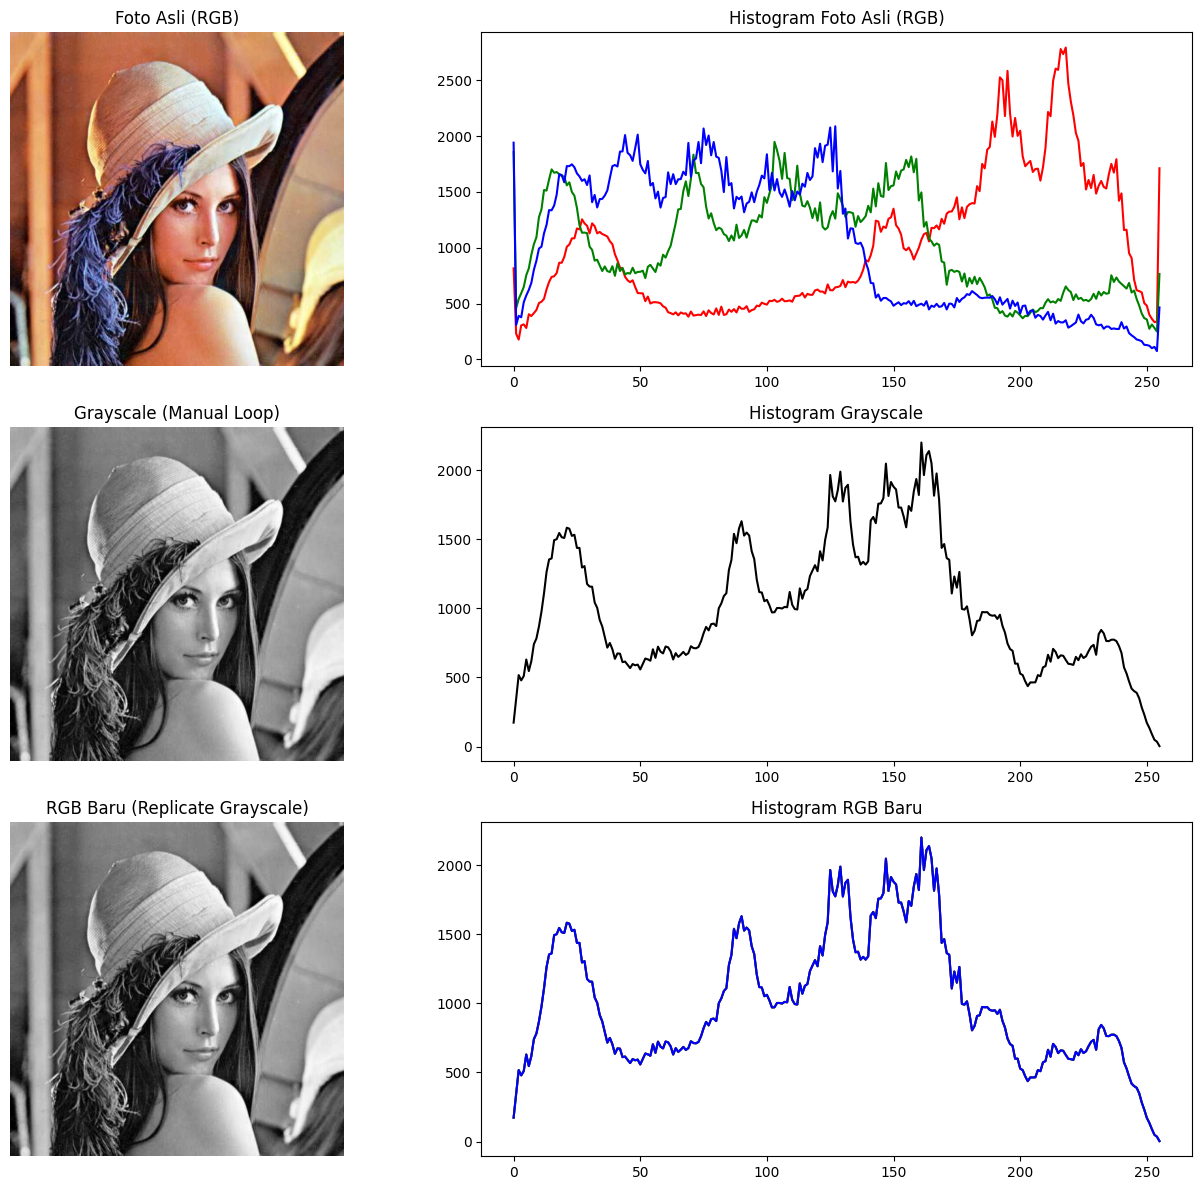

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("/content/drive/MyDrive/Polinema/tugasSemester5/PengolahanCitradanVisiKomputer/Pertemuan 5/Lena.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_grayscale = np.zeros((img_rgb.shape[0], img_rgb.shape[1]), dtype=np.uint8)
for i in range(img_rgb.shape[0]):
    for j in range(img_rgb.shape[1]):
        R = img_rgb[i, j, 0]
        G = img_rgb[i, j, 1]
        B = img_rgb[i, j, 2]
        gray_val = int(0.299 * R + 0.587 * G + 0.114 * B)
        img_grayscale[i, j] = gray_val
rgb_simple = np.stack((img_grayscale,)*3, axis=-1)

hist_r_orig, _ = np.histogram(img_rgb[:,:,0].ravel(), bins=256, range=[0,256])
hist_g_orig, _ = np.histogram(img_rgb[:,:,1].ravel(), bins=256, range=[0,256])
hist_b_orig, _ = np.histogram(img_rgb[:,:,2].ravel(), bins=256, range=[0,256])

hist_gray, _ = np.histogram(img_grayscale.ravel(), bins=256, range=[0,256])

hist_r_new, _ = np.histogram(rgb_simple[:,:,0].ravel(), bins=256, range=[0,256])
hist_g_new, _ = np.histogram(rgb_simple[:,:,1].ravel(), bins=256, range=[0,256])
hist_b_new, _ = np.histogram(rgb_simple[:,:,2].ravel(), bins=256, range=[0,256])

fig, axes = plt.subplots(3, 2, figsize=(14, 12))

axes[0,0].imshow(img_rgb)
axes[0,0].set_title("Foto Asli (RGB)")
axes[0,0].axis("off")

axes[0,1].plot(hist_r_orig, color="red")
axes[0,1].plot(hist_g_orig, color="green")
axes[0,1].plot(hist_b_orig, color="blue")
axes[0,1].set_title("Histogram Foto Asli (RGB)")

axes[1,0].imshow(img_grayscale, cmap="gray")
axes[1,0].set_title("Grayscale (Manual Loop)")
axes[1,0].axis("off")

axes[1,1].plot(hist_gray, color="black")
axes[1,1].set_title("Histogram Grayscale")

axes[2,0].imshow(rgb_simple)
axes[2,0].set_title("RGB Baru (Replicate Grayscale)")
axes[2,0].axis("off")

axes[2,1].plot(hist_r_new, color="red")
axes[2,1].plot(hist_g_new, color="green")
axes[2,1].plot(hist_b_new, color="blue")
axes[2,1].set_title("Histogram RGB Baru")

plt.tight_layout()
plt.show()

# **Pertanyaan Praktikum D1**

1. Buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh NumPy yaitu “histogram”. Bandingkan hasilnya. Apakah output muncul sama?

Jawab :
Hasil histogram

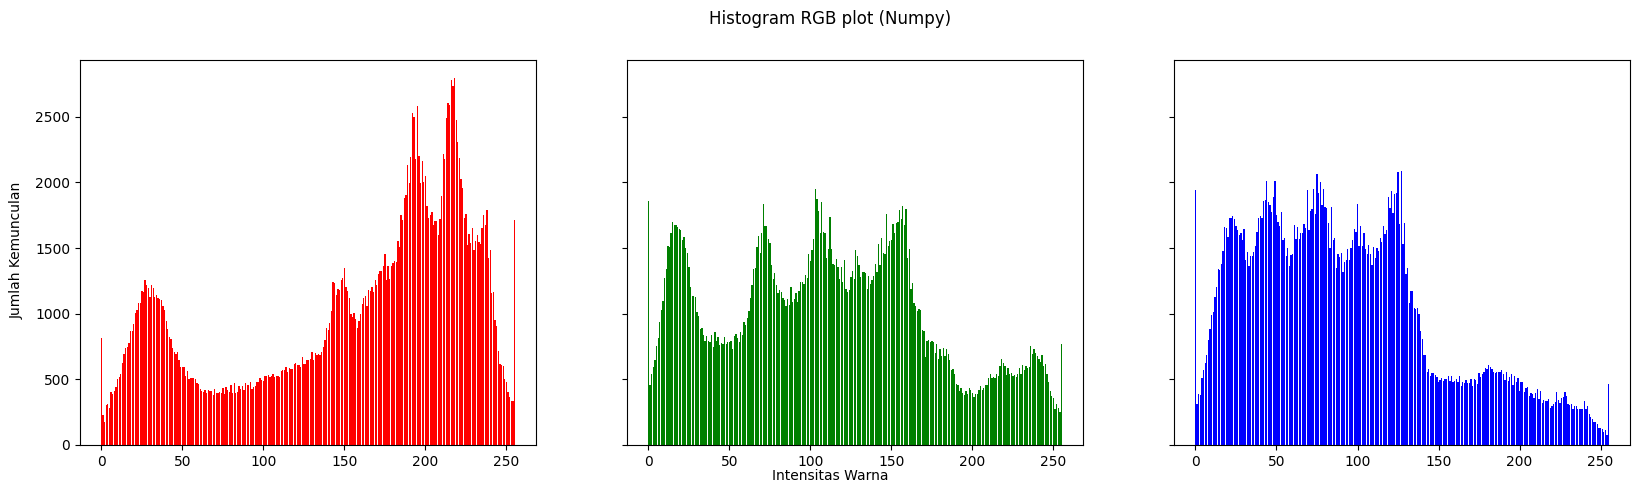

In [9]:
# Muat gambar dan konversi ke RGB
img = cv.imread('/content/drive/MyDrive/Polinema/tugasSemester5/PengolahanCitradanVisiKomputer/Pertemuan 5/Lena.jpg')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Pisahkan saluran warna
R, G, B = cv.split(img_rgb)

# Hitung histogram menggunakan np.histogram()
hist_r, bins_r = np.histogram(R.flatten(), 256, [0, 256])
hist_g, bins_g = np.histogram(G.flatten(), 256, [0, 256])
hist_b, bins_b = np.histogram(B.flatten(), 256, [0, 256])

# Tampilkan plot histogram
fig, axs = plt.subplots(1, 3, figsize=[20, 5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot (Numpy)')

fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')

axs[0].bar(bins_r[:-1], hist_r, color='red')
axs[1].bar(bins_g[:-1], hist_g, color='green')
axs[2].bar(bins_b[:-1], hist_b, color='blue')

plt.show()

2. Buatlah histogram dengan menggunakan dengan menggunakan image KTMlama.jpg.Analisis distribusi intensitas dari histogram yang dihasilkan apakah gambar cenderung gelap, terang, atau kontras rendah.

Jawab :     
untuk gambar KTM1a cenderung gelap, KTM1b cenderung terang, KTM1c cenderung terang, KTM1d cenderung terang

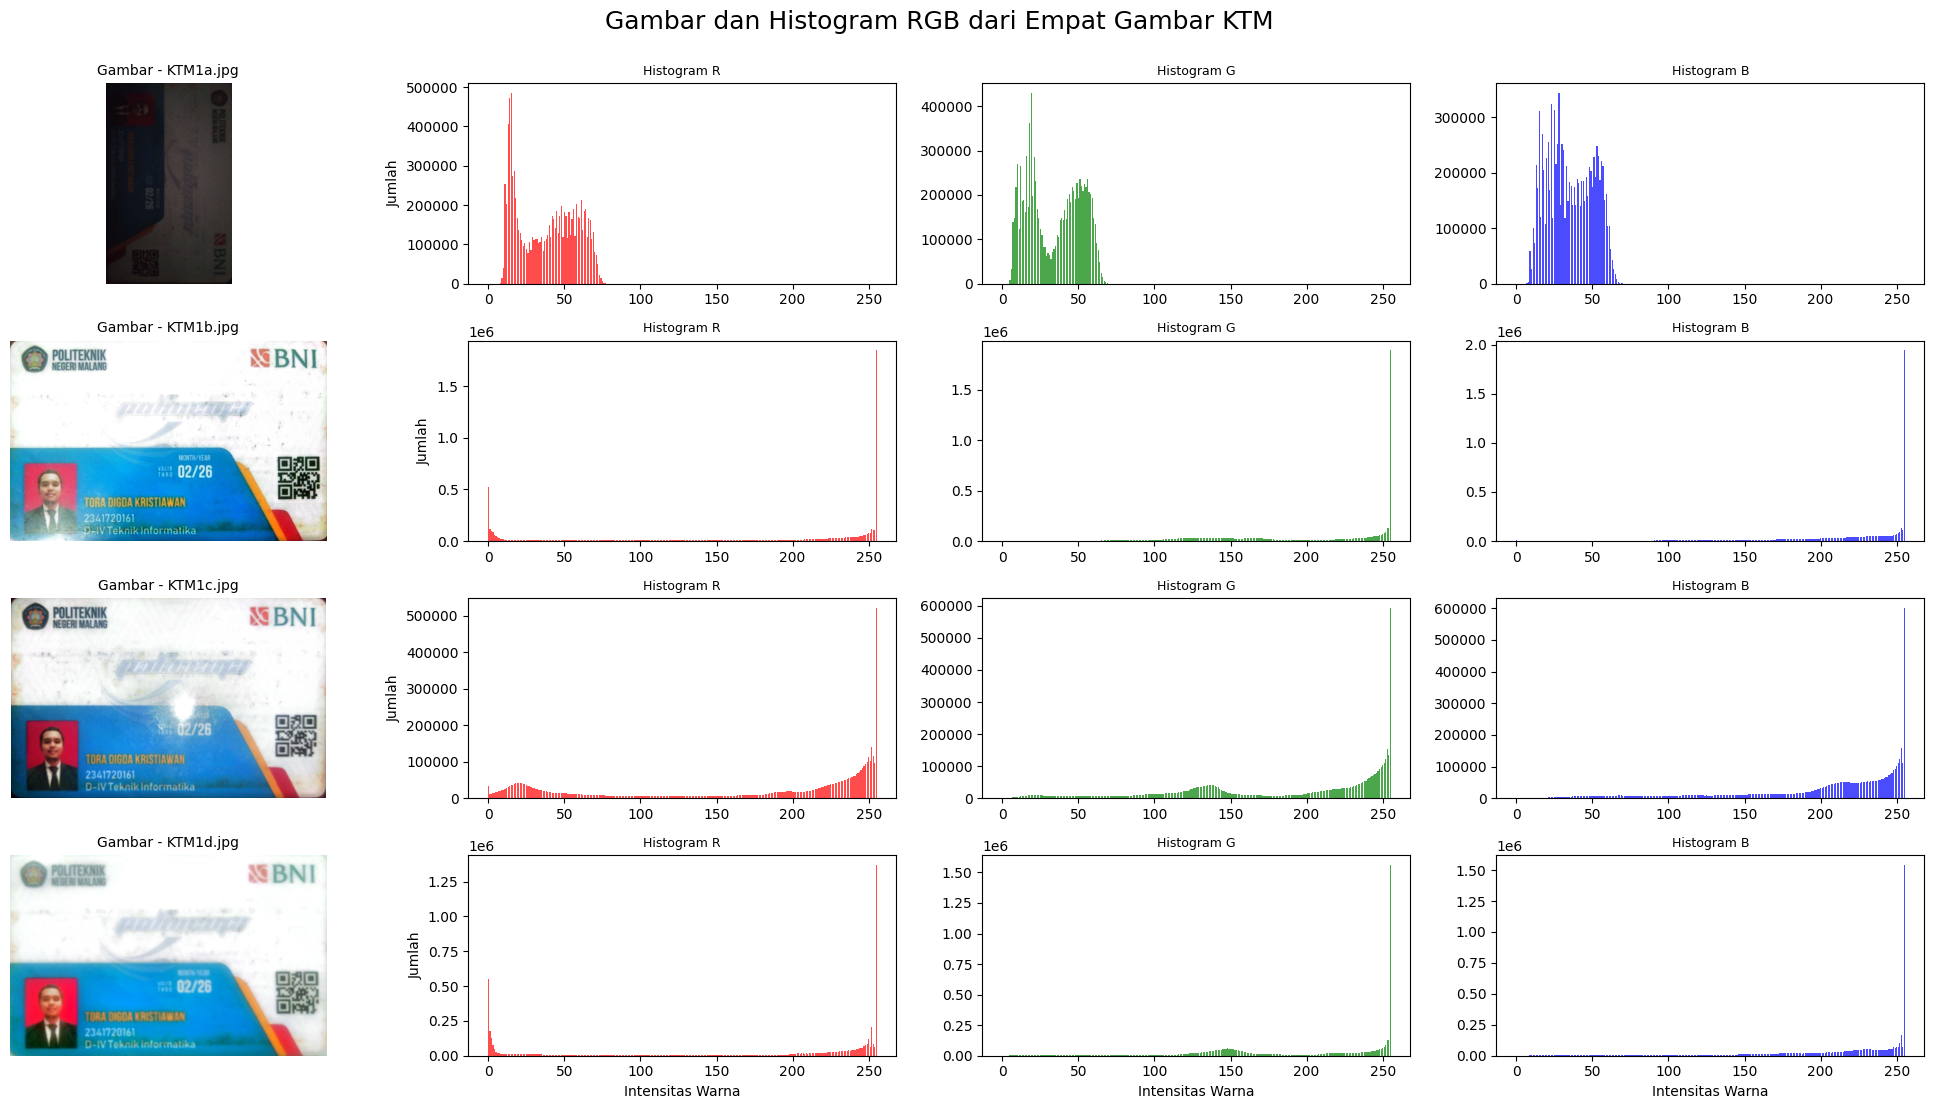

In [16]:
image_files = ['/content/drive/MyDrive/Polinema/tugasSemester5/PengolahanCitradanVisiKomputer/Pertemuan 5/KTM1a.jpg',
               '/content/drive/MyDrive/Polinema/tugasSemester5/PengolahanCitradanVisiKomputer/Pertemuan 5/KTM1b.jpg',
               '/content/drive/MyDrive/Polinema/tugasSemester5/PengolahanCitradanVisiKomputer/Pertemuan 5/KTM1c.jpg',
               '/content/drive/MyDrive/Polinema/tugasSemester5/PengolahanCitradanVisiKomputer/Pertemuan 5/KTM1d.jpg']

# Siapkan figur dan subplot: 4 baris (gambar), 4 kolom (gambar + RGB)
fig, axs = plt.subplots(len(image_files), 4, figsize=(20, 12), sharex=False, sharey=False)
fig.suptitle('Gambar dan Histogram RGB dari Empat Gambar KTM', fontsize=18, y=0.95)

# Looping untuk setiap gambar
for i, filename in enumerate(image_files):
    try:
        img = cv.imread(filename)
        if img is None:
            raise FileNotFoundError(f"File '{filename}' tidak ditemukan.")

        img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        R, G, B = cv.split(img_rgb)

        # Hitung histogram
        hist_r, _ = np.histogram(R.flatten(), 256, [0, 256])
        hist_g, _ = np.histogram(G.flatten(), 256, [0, 256])
        hist_b, _ = np.histogram(B.flatten(), 256, [0, 256])

        short_name = os.path.basename(filename)

        # Tampilkan gambar
        axs[i, 0].imshow(img_rgb)
        axs[i, 0].set_title(f'Gambar - {short_name}', fontsize=10)
        axs[i, 0].axis('off')

        # Histogram R
        axs[i, 1].bar(np.arange(256), hist_r, color='red', alpha=0.7)
        axs[i, 1].set_title('Histogram R', fontsize=9)

        # Histogram G
        axs[i, 2].bar(np.arange(256), hist_g, color='green', alpha=0.7)
        axs[i, 2].set_title('Histogram G', fontsize=9)

        # Histogram B
        axs[i, 3].bar(np.arange(256), hist_b, color='blue', alpha=0.7)
        axs[i, 3].set_title('Histogram B', fontsize=9)

        # Tambahkan label sumbu hanya untuk baris paling bawah
        if i == len(image_files) - 1:
            axs[i, 1].set_xlabel('Intensitas Warna')
            axs[i, 2].set_xlabel('Intensitas Warna')
            axs[i, 3].set_xlabel('Intensitas Warna')

        # Tambahkan label y hanya di kolom histogram pertama
        axs[i, 1].set_ylabel('Jumlah')

    except FileNotFoundError as e:
        print(e)
        for j in range(4):
            axs[i, j].text(0.5, 0.5, 'Gambar tidak ditemukan',
                          ha='center', va='center', fontsize=12, color='red')
            axs[i, j].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# **PRAKTIKUM D2**

membuat histogram citra seperti output histogram equalization dan juga tampilan gambar sebelum dan sesudah proses histogram equalization

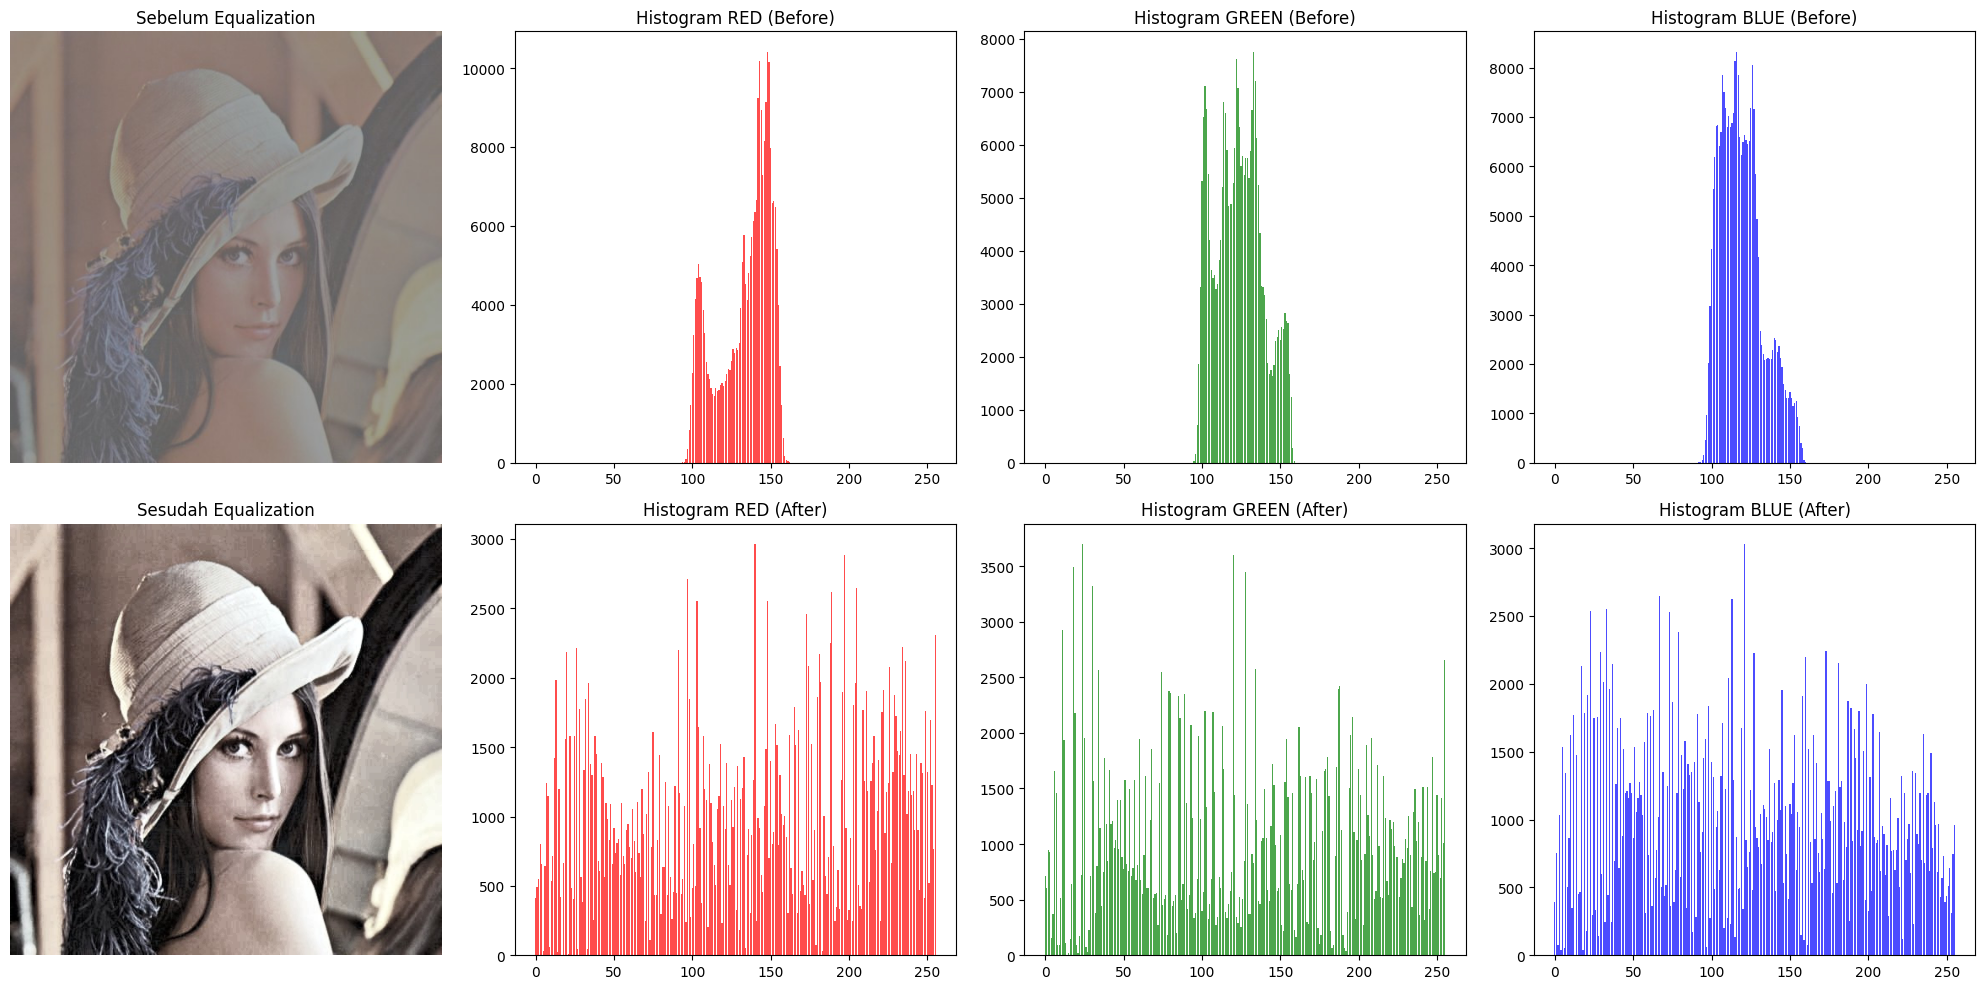

In [17]:
# Load gambar
img = cv.imread('/content/drive/MyDrive/Polinema/tugasSemester5/PengolahanCitradanVisiKomputer/Pertemuan 5/Lena_lc.jpg')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Konversi ke YCrCb
ycrcb = cv.cvtColor(img, cv.COLOR_BGR2YCrCb)
y, cr, cb = cv.split(ycrcb)

# Equalisasi hanya pada channel Y (luminance)
y_eq = cv.equalizeHist(y)
ycrcb_eq = cv.merge([y_eq, cr, cb])
img_eq = cv.cvtColor(ycrcb_eq, cv.COLOR_YCrCb2RGB)

# Fungsi untuk hitung histogram RGB
def calc_hist_rgb(image):
    colors = ('red', 'green', 'blue')
    chans = cv.split(image)
    hists = []
    for chan, color in zip(chans, colors):
        hist, _ = np.histogram(chan.flatten(), 256, [0,256])
        hists.append((hist, color))
    return hists

# Hitung histogram sebelum dan sesudah
hists_before = calc_hist_rgb(img_rgb)
hists_after = calc_hist_rgb(img_eq)

# Plot hasil
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

# Gambar asli
axs[0,0].imshow(img_rgb)
axs[0,0].set_title("Sebelum Equalization")
axs[0,0].axis("off")

# Gambar hasil equalization
axs[1,0].imshow(img_eq)
axs[1,0].set_title("Sesudah Equalization")
axs[1,0].axis("off")

# Histogram sebelum (RGB)
for i, (hist, color) in enumerate(hists_before):
    axs[0,i+1].bar(np.arange(256), hist, color=color, alpha=0.7)
    axs[0,i+1].set_title(f"Histogram {color.upper()} (Before)")

# Histogram sesudah (RGB)
for i, (hist, color) in enumerate(hists_after):
    axs[1,i+1].bar(np.arange(256), hist, color=color, alpha=0.7)
    axs[1,i+1].set_title(f"Histogram {color.upper()} (After)")

plt.tight_layout()
plt.show()


membuat histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh CV2 yaitu “equalizeHist”

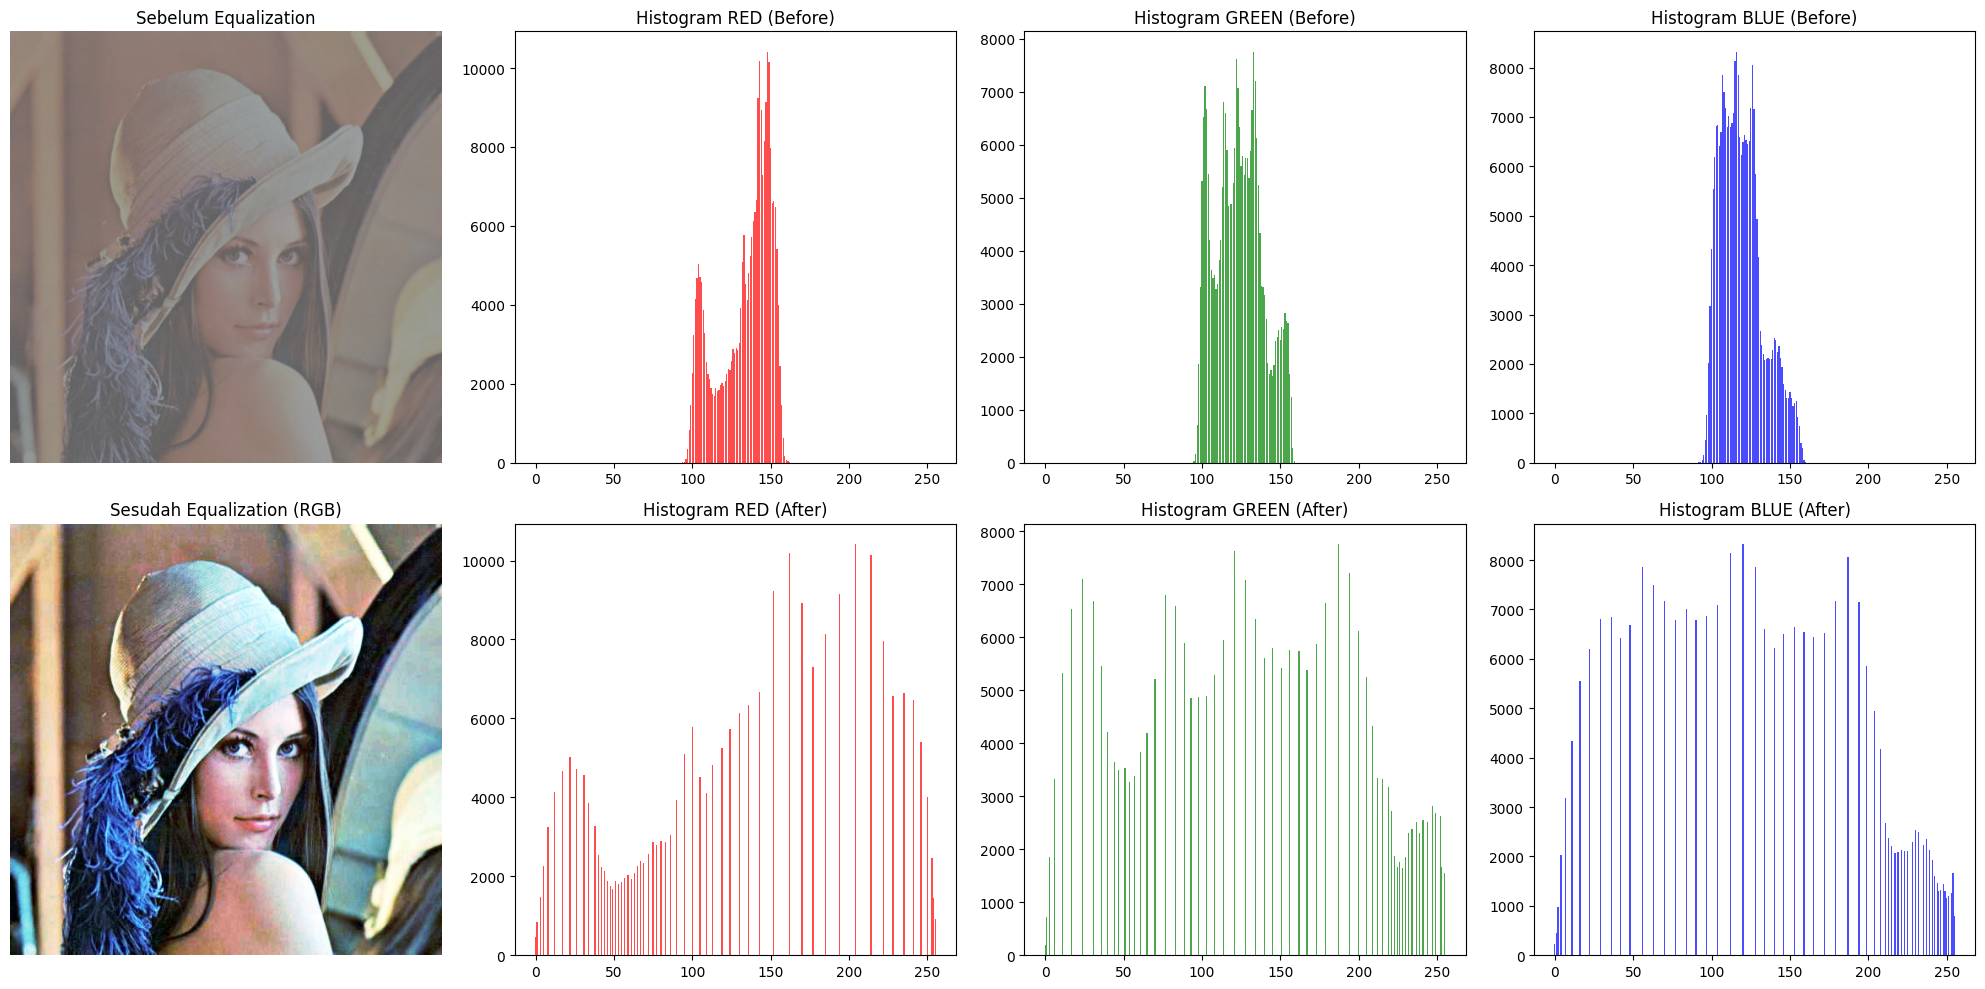

In [20]:
# Load gambar
img = cv.imread('/content/drive/MyDrive/Polinema/tugasSemester5/PengolahanCitradanVisiKomputer/Pertemuan 5/Lena_lc.jpg')

# Split ke channel B, G, R
b, g, r = cv.split(img)

# Lakukan histogram equalization per channel
b_equalized = cv.equalizeHist(b)
g_equalized = cv.equalizeHist(g)
r_equalized = cv.equalizeHist(r)

# Gabungkan kembali
img_eq_rgb = cv.merge((b_equalized, g_equalized, r_equalized))
img_eq_rgb = cv.cvtColor(img_eq_rgb, cv.COLOR_BGR2RGB)  # Konversi untuk ditampilkan dengan matplotlib
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Fungsi untuk hitung histogram RGB
def calc_hist_rgb(image):
    chans = cv.split(image)
    colors = ('red', 'green', 'blue')
    hists = []
    for chan, color in zip(chans, colors):
        hist, _ = np.histogram(chan.flatten(), 256, [0, 256])
        hists.append((hist, color))
    return hists

# Hitung histogram sebelum dan sesudah
hists_before = calc_hist_rgb(img_rgb)
hists_after = calc_hist_rgb(img_eq_rgb)

# Plot hasil
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

# Gambar asli
axs[0,0].imshow(img_rgb)
axs[0,0].set_title("Sebelum Equalization")
axs[0,0].axis("off")

# Gambar hasil equalization RGB
axs[1,0].imshow(img_eq_rgb)
axs[1,0].set_title("Sesudah Equalization (RGB)")
axs[1,0].axis("off")

# Histogram sebelum
for i, (hist, color) in enumerate(hists_before):
    axs[0,i+1].bar(np.arange(256), hist, color=color, alpha=0.7)
    axs[0,i+1].set_title(f"Histogram {color.upper()} (Before)")

# Histogram sesudah
for i, (hist, color) in enumerate(hists_after):
    axs[1,i+1].bar(np.arange(256), hist, color=color, alpha=0.7)
    axs[1,i+1].set_title(f"Histogram {color.upper()} (After)")

plt.tight_layout()
plt.show()

# **TUGAS PRAKTIKUM D2**

1. Perbandingan Citra Lena
    

a. Gunakan hasil histogram equalization pada citra lena.jpg.

b. Hitung nilai PSNR antara citra asli dan citra hasil equalization.

c. Apakah nilai PSNR tinggi atau rendah? Apa arti nilai tersebut terhadap kualitas visual citra? Apakah ada detail baru yang muncul setelah equalization?
Jawab:
Nilai PSNR rendah artinya hasil kualitas visualisainya rendah.Hasil setelah equalization Detail pada area gelap/terang lebih terlihat jelas, Kontras meningkat, perbedaan objek dengan latar lebih dapat terlihat

PSNR antara Lena asli dan Lena equalized: 29.688975710790224 dB


/tmp/ipython-input-2165776130.py:25: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.subplot(2,2,2), plt.hist(lena.ravel(), 256, [0,256]), plt.title("Histogram Lena Asli")
/tmp/ipython-input-2165776130.py:29: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.subplot(2,2,4), plt.hist(lena_eq.ravel(), 256, [0,256]), plt.title("Histogram Lena Equalized")


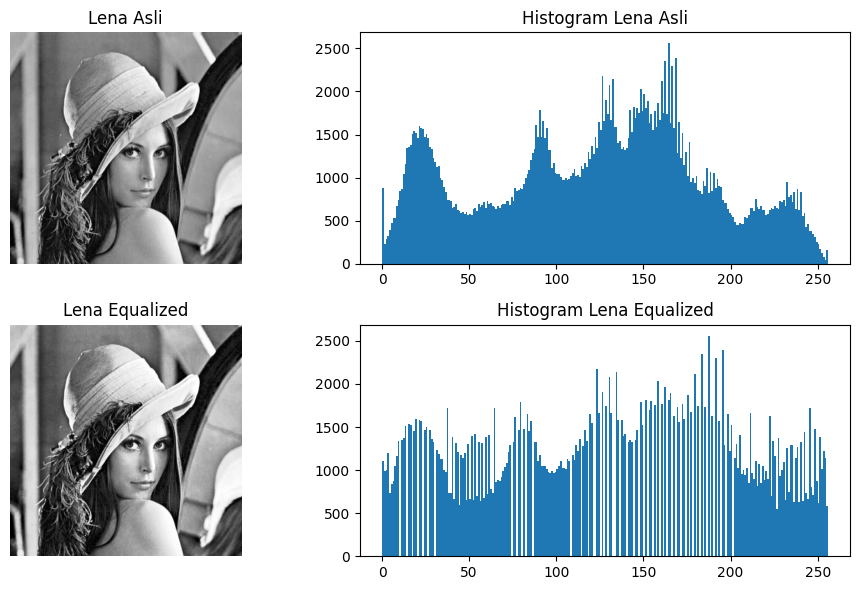

In [21]:
# Fungsi bantu hitung PSNR
def calculate_psnr(original, processed):
    mse = np.mean((original - processed) ** 2)
    if mse == 0:
        return float("inf")
    max_pixel = 255.0
    psnr = 10 * np.log10((max_pixel ** 2) / mse)
    return psnr

# 1. Histogram Equalization pada Lena
lena = cv2.imread("/content/drive/MyDrive/Polinema/tugasSemester5/PengolahanCitradanVisiKomputer/Pertemuan 5/Lena.jpg", cv2.IMREAD_GRAYSCALE)

# Equalization
lena_eq = cv2.equalizeHist(lena)

# Hitung PSNR
psnr_lena = calculate_psnr(lena, lena_eq)
print("PSNR antara Lena asli dan Lena equalized:", psnr_lena, "dB")

# Tampilkan hasil dan histogram
plt.figure(figsize=(10,6))

plt.subplot(2,2,1), plt.imshow(lena, cmap='gray'), plt.title("Lena Asli")
plt.axis("off")
plt.subplot(2,2,2), plt.hist(lena.ravel(), 256, [0,256]), plt.title("Histogram Lena Asli")

plt.subplot(2,2,3), plt.imshow(lena_eq, cmap='gray'), plt.title("Lena Equalized")
plt.axis("off")
plt.subplot(2,2,4), plt.hist(lena_eq.ravel(), 256, [0,256]), plt.title("Histogram Lena Equalized")

plt.tight_layout()
plt.show()


2. Gunakan Citra KTM Lama.jpg

a. Terapkan histogram equalization pada citra KTM lama.jpg.

b. Tampilkan citra asli, citra hasil equalization, serta histogram keduanya dalam satu layout.

c. Bandingkan citra KTM lama.jpg sebelum dan sesudah histogram equalization.Jelaskan perbedaan yang terlihat secara visual (misalnya pada detail wajah, teks, atau latar belakang). Apakah perubahan tersebut meningkatkan kualitas informasi dari citra atau justru membuat citra terlihat terlalu “keras”.

Jawab :     

ada beberapa hasil yang detail wajah dan teks nya lebih gelap setelah dilakukan equalization seperti pada gambar ktm2, ktm3, dan ktm4

[KTM1] PSNR antara asli dan equalized: 27.94 dB


/tmp/ipython-input-4155212599.py:33: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.subplot(2,2,2), plt.hist(img.ravel(), 256, [0,256]), plt.title(f"Histogram KTM{i} Asli")
/tmp/ipython-input-4155212599.py:37: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.subplot(2,2,4), plt.hist(img_eq.ravel(), 256, [0,256]), plt.title(f"Histogram KTM{i} Equalized")


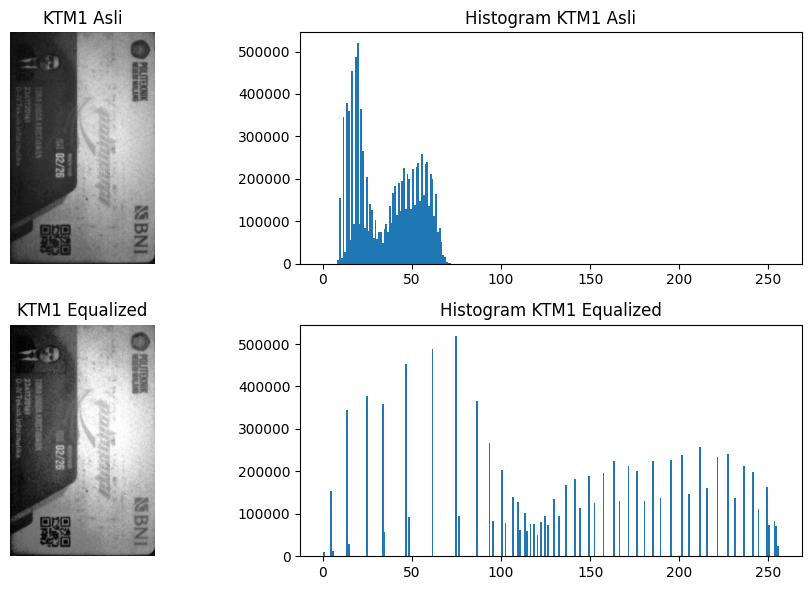

[KTM2] PSNR antara asli dan equalized: 29.47 dB


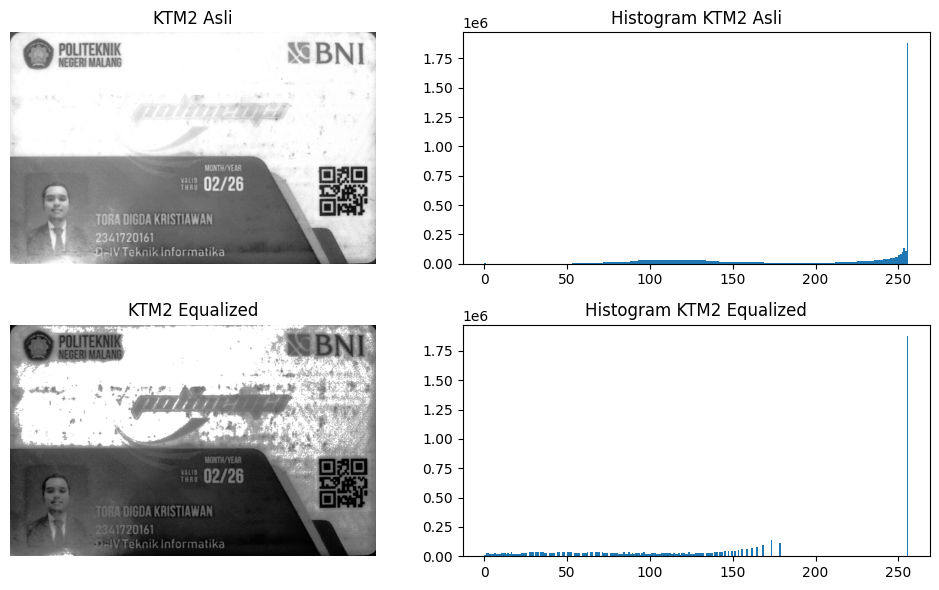

[KTM3] PSNR antara asli dan equalized: 27.32 dB


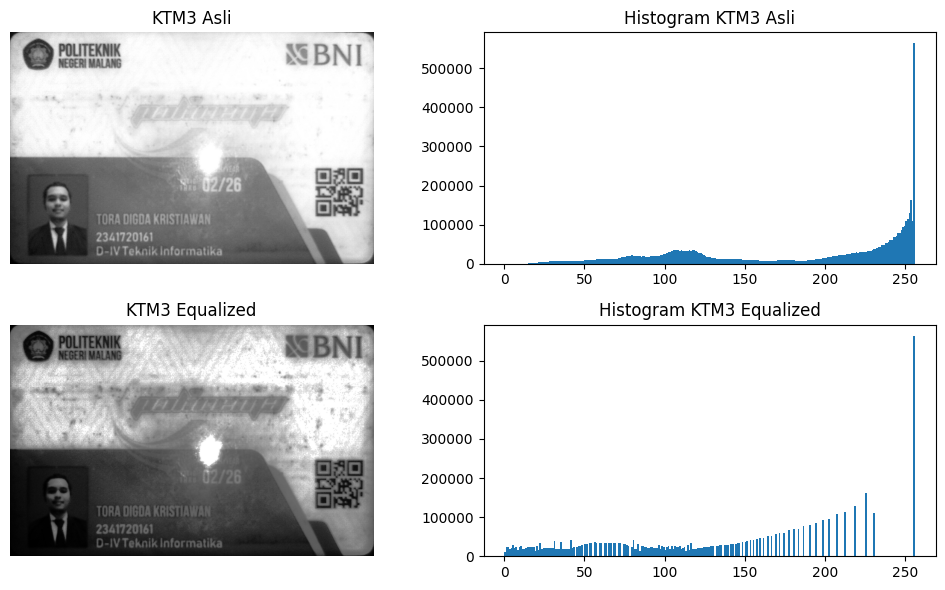

[KTM4] PSNR antara asli dan equalized: 28.62 dB


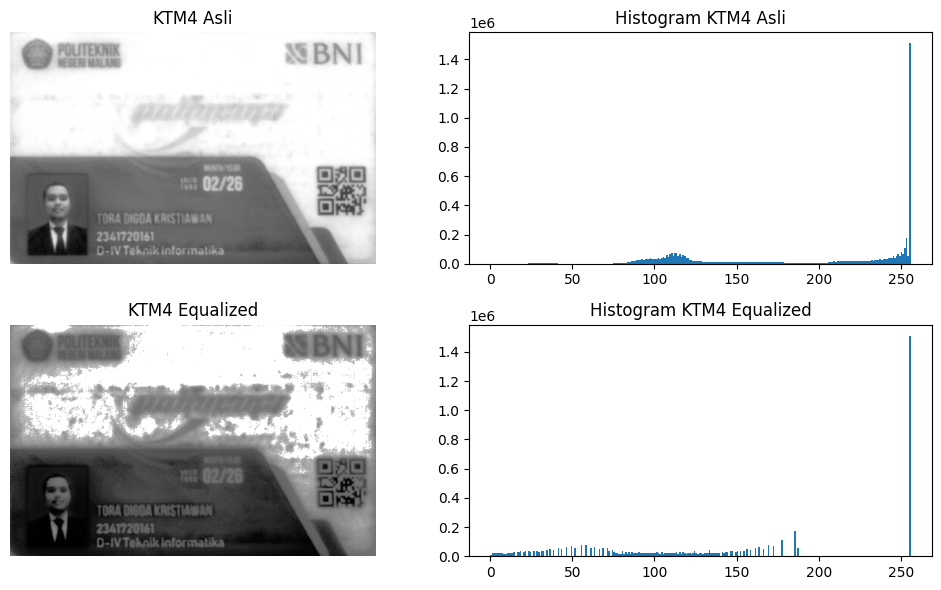

In [23]:
# Fungsi bantu hitung PSNR
def calculate_psnr(original, processed):
    mse = np.mean((original - processed) ** 2)
    if mse == 0:
        return float("inf")
    max_pixel = 255.0
    psnr = 10 * np.log10((max_pixel ** 2) / mse)
    return psnr

# Daftar file KTM (ganti sesuai path 4 gambar kamu)
ktm_files = ['/content/drive/MyDrive/Polinema/tugasSemester5/PengolahanCitradanVisiKomputer/Pertemuan 5/KTM1a.jpg',
               '/content/drive/MyDrive/Polinema/tugasSemester5/PengolahanCitradanVisiKomputer/Pertemuan 5/KTM1b.jpg',
               '/content/drive/MyDrive/Polinema/tugasSemester5/PengolahanCitradanVisiKomputer/Pertemuan 5/KTM1c.jpg',
               '/content/drive/MyDrive/Polinema/tugasSemester5/PengolahanCitradanVisiKomputer/Pertemuan 5/KTM1d.jpg']

# Loop untuk setiap gambar KTM
for i, file in enumerate(ktm_files, 1):
    # Baca gambar grayscale
    img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)

    # Histogram Equalization
    img_eq = cv2.equalizeHist(img)

    # Hitung PSNR
    psnr_val = calculate_psnr(img, img_eq)
    print(f"[KTM{i}] PSNR antara asli dan equalized: {psnr_val:.2f} dB")

    # Plot hasil
    plt.figure(figsize=(10,6))

    plt.subplot(2,2,1), plt.imshow(img, cmap='gray'), plt.title(f"KTM{i} Asli")
    plt.axis("off")
    plt.subplot(2,2,2), plt.hist(img.ravel(), 256, [0,256]), plt.title(f"Histogram KTM{i} Asli")

    plt.subplot(2,2,3), plt.imshow(img_eq, cmap='gray'), plt.title(f"KTM{i} Equalized")
    plt.axis("off")
    plt.subplot(2,2,4), plt.hist(img_eq.ravel(), 256, [0,256]), plt.title(f"Histogram KTM{i} Equalized")

    plt.tight_layout()
    plt.show()

# **TUGAS PRAKTIKUM 3**

melakukan proses dithering Floyd and Steinberg

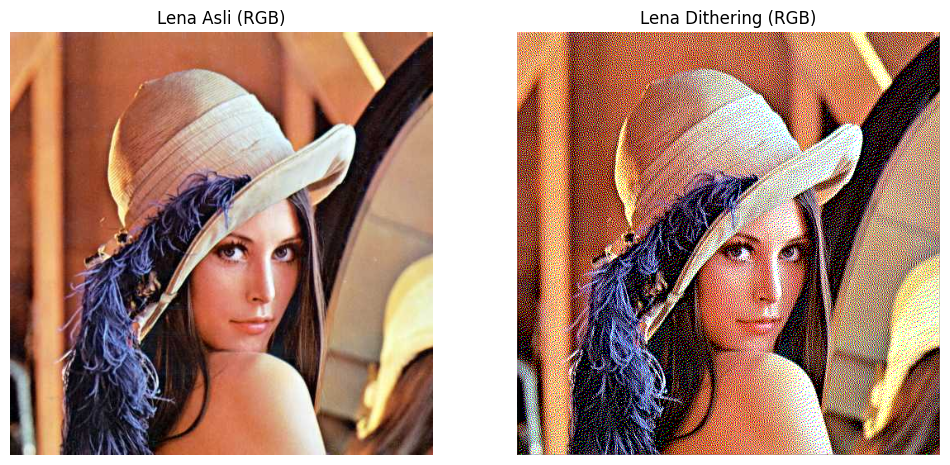

In [31]:
def floyd_steinberg_dithering(img_channel):
    """Dithering untuk 1 channel (grayscale)"""
    h, w = img_channel.shape
    img = img_channel.astype(float)

    for y in range(h-1):
        for x in range(1, w-1):
            old_pixel = img[y, x]
            new_pixel = 0 if old_pixel < 128 else 255
            img[y, x] = new_pixel
            error = old_pixel - new_pixel

            # Sebarkan error sesuai Floyd–Steinberg
            img[y, x+1] += error * 7/16
            img[y+1, x-1] += error * 3/16
            img[y+1, x]   += error * 5/16
            img[y+1, x+1] += error * 1/16

    return img.astype(np.uint8)

#Baca gambar Lena
lena = cv2.imread("/content/drive/MyDrive/Polinema/tugasSemester5/PengolahanCitradanVisiKomputer/Pertemuan 5/Lena.jpg")
lena = cv2.cvtColor(lena, cv2.COLOR_BGR2RGB)

#Pisahkan channel
R, G, B = cv2.split(lena)

#Terapkan dithering ke tiap channel
R_d = floyd_steinberg_dithering(R)
G_d = floyd_steinberg_dithering(G)
B_d = floyd_steinberg_dithering(B)

#Gabungkan kembali
lena_dithered_rgb = cv2.merge([R_d, G_d, B_d])

#Tampilkan hasil
plt.figure(figsize=(12,6))
plt.subplot(1,2,1), plt.imshow(lena), plt.title("Lena Asli (RGB)"), plt.axis("off")
plt.subplot(1,2,2), plt.imshow(lena_dithered_rgb), plt.title("Lena Dithering (RGB)"), plt.axis("off")
plt.show()


Menggunakan lena_lc.jpg rubah menjadi grey image, kemudian terapkan histogram
equalization sehingga terjadi perbaikan sebaran warna pada citra. Setelah itu dari hasil
histogram equalization implementasikan proses dithering Floyd and Steinberg

Citra Asli (Grayscale) vs. Citra Setelah Histogram Equalization


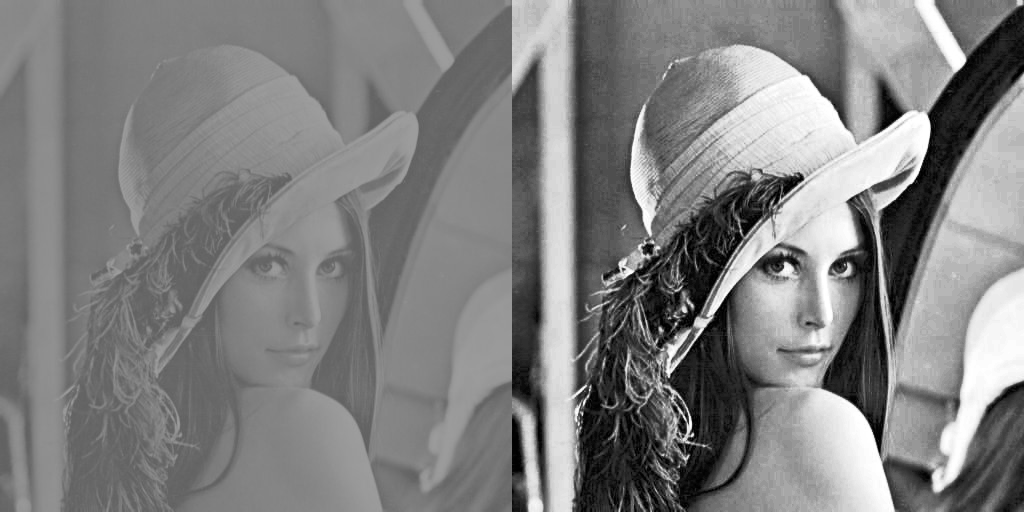

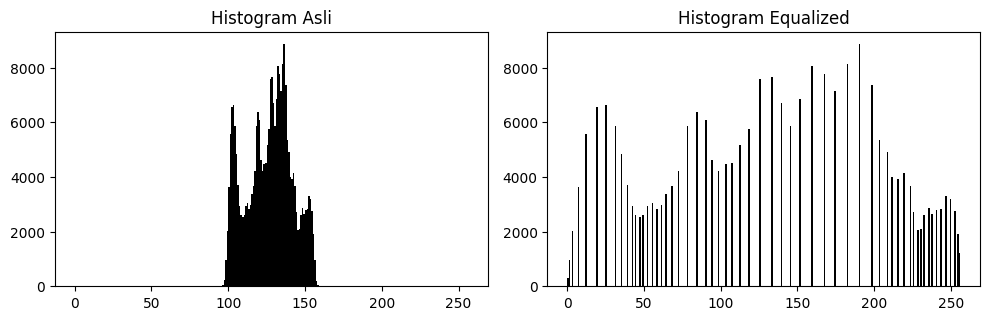

Citra Hasil Dithering Floyd-Steinberg:


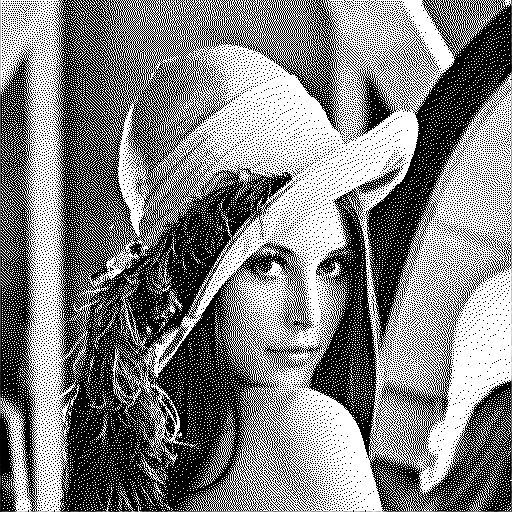

In [36]:
#Floyd-Steinberg dithering untuk grayscale
def floyd_steinberg_dithering(img):
    h, w = img.shape
    img = img.astype(float)

    for y in range(h-1):
        for x in range(1, w-1):
            old_pixel = img[y, x]
            new_pixel = 0 if old_pixel < 128 else 255
            img[y, x] = new_pixel
            error = old_pixel - new_pixel

            # Sebarkan error ke tetangga (Floyd–Steinberg)
            img[y, x+1] += error * 7/16
            img[y+1, x-1] += error * 3/16
            img[y+1, x]   += error * 5/16
            img[y+1, x+1] += error * 1/16

    return img.astype(np.uint8)

#1. Baca gambar dan ubah ke grayscale
lena = cv2.imread("/content/drive/MyDrive/Polinema/tugasSemester5/PengolahanCitradanVisiKomputer/Pertemuan 5/Lena_lc.jpg", cv2.IMREAD_GRAYSCALE)

#2. Histogram Equalization
lena_eq = cv2.equalizeHist(lena)

#3. Dithering setelah equalization
lena_dithered = floyd_steinberg_dithering(lena_eq)

# Tampilkan citra sebelum dan sesudah equalization
print("Citra Asli (Grayscale) vs. Citra Setelah Histogram Equalization")
combined_equalization = np.hstack((lena, lena_eq))
cv2_imshow(combined_equalization)

plt.figure(figsize=(10,6))

# Histogram asli
plt.subplot(2,2,1), plt.hist(lena.ravel(), bins=256, range=[0,256], color="black")
plt.title("Histogram Asli")

# Histogram equalized
plt.subplot(2,2,2), plt.hist(lena_eq.ravel(), bins=256, range=[0,256], color="black")
plt.title("Histogram Equalized")

plt.tight_layout()  # supaya tidak saling tumpang tindih
plt.show()

# Tampilkan hasil akhir
print("Citra Hasil Dithering Floyd-Steinberg:")
cv2_imshow(lena_dithered)